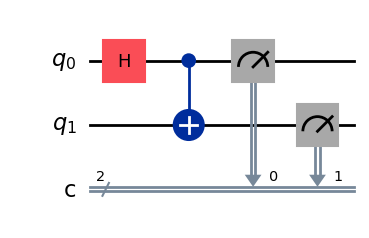

In [2]:
#https://docs.quantum.ibm.com/guides/pulse
from qiskit import QuantumCircuit
 
circ = QuantumCircuit(2, 2)
circ.h(0)
circ.cx(0, 1)
circ.measure(0, 0)
circ.measure(1, 1)
 
circ.draw('mpl')

In [3]:
from qiskit import pulse
from qiskit.pulse.library import Gaussian
from qiskit_ibm_runtime.fake_provider import FakeValenciaV2
 
backend = FakeValenciaV2()
 
with pulse.build(backend, name='hadamard') as h_q0:
    pulse.play(Gaussian(duration=128, amp=0.1, sigma=16), pulse.drive_channel(0))

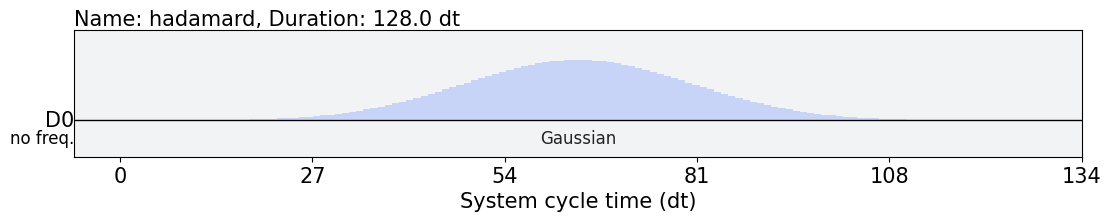

In [4]:
h_q0.draw()

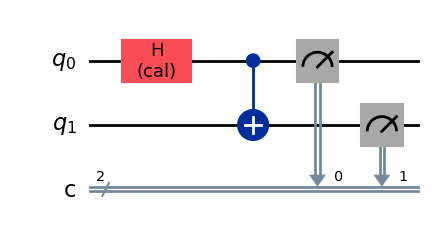

In [5]:
circ.add_calibration('h', [0], h_q0)
circ.draw('mpl')

Instruction(name='rz', num_qubits=1, num_clbits=0, params=[Parameter(λ)]) (0,)
Instruction(name='rz', num_qubits=1, num_clbits=0, params=[Parameter(λ)]) (1,)
Delay(duration=t[unit=dt]) (0,)
Delay(duration=t[unit=dt]) (1,)
Instruction(name='sx', num_qubits=1, num_clbits=0, params=[]) (0,)
Instruction(name='sx', num_qubits=1, num_clbits=0, params=[]) (1,)
Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]) (0, 1)
Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]) (1, 0)
Instruction(name='reset', num_qubits=1, num_clbits=0, params=[]) (0,)
Instruction(name='reset', num_qubits=1, num_clbits=0, params=[]) (1,)
Instruction(name='x', num_qubits=1, num_clbits=0, params=[]) (0,)
Instruction(name='x', num_qubits=1, num_clbits=0, params=[]) (1,)
Instruction(name='id', num_qubits=1, num_clbits=0, params=[]) (0,)
Instruction(name='id', num_qubits=1, num_clbits=0, params=[]) (1,)
Instruction(name='measure', num_qubits=1, num_clbits=1, params=[]) (0,)
Instruction(name='measure', 

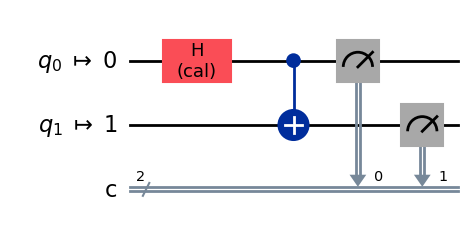

In [6]:
from qiskit_ibm_runtime.fake_provider import FakeHanoiV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
 
backend = FakeHanoiV2()
passmanager = generate_preset_pass_manager(optimization_level=1, backend=backend)
circ = passmanager.run(circ)
 
# Print instructions that only affect qubits 0 and 1
for instruction, qubits in FakeHanoiV2().instructions:
    if qubits and set(qubits).issubset({0, 1}):
        print(instruction, qubits)
circ.draw('mpl', idle_wires=False)

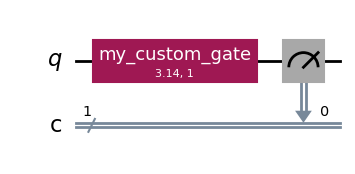

In [7]:
from qiskit import QuantumCircuit
from qiskit.circuit import Gate
 
circ = QuantumCircuit(1, 1)
custom_gate = Gate('my_custom_gate', 1, [3.14, 1])
# 3.14 is an arbitrary parameter for demonstration
circ.append(custom_gate, [0])
circ.measure(0, 0)
 
circ.draw('mpl')

In [8]:
with pulse.build(backend, name='custom') as my_schedule:
    pulse.play(Gaussian(duration=64, amp=0.2, sigma=8), pulse.drive_channel(0))
 
circ.add_calibration('my_custom_gate', [0], my_schedule, [3.14, 1])
# Alternatively: circ.add_calibration(custom_gate, [0], my_schedule)

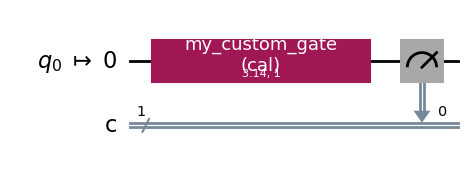

In [9]:
circ = passmanager.run(circ)
circ.draw('mpl', idle_wires=False)

In [10]:
circ = QuantumCircuit(2, 2)
circ.append(custom_gate, [1])
 
 
from qiskit import QiskitError
try:
    circ = passmanager.run(circ)
except QiskitError as e:
    print(e)

"HighLevelSynthesis was unable to synthesize Instruction(name='my_custom_gate', num_qubits=1, num_clbits=0, params=[3.14, 1])."


In [11]:
from qiskit_ibm_runtime.fake_provider import FakeKyoto
from qiskit.circuit import QuantumCircuit, Gate
from qiskit.pulse import builder, DriveChannel
from qiskit.transpiler import InstructionProperties
 
backend = FakeKyoto()
 
custom_gate = Gate("my_gate", 1, [])
qc = QuantumCircuit(1, 1)
qc.append(custom_gate, [0])
qc.measure(0, 0)
 
with builder.build() as custom_sched_q0:
    builder.play([0.1] * 160, DriveChannel(0))
 
backend.target.add_instruction(
    custom_gate,
    {(0,): InstructionProperties(calibration=custom_sched_q0)},
)
 
# Re-generate the passmanager with the new backend target
passmanager = generate_preset_pass_manager(optimization_level=1, backend=backend)
qc = passmanager.run(qc)

In [12]:
from qiskit import pulse
 
with pulse.build(name='my_example') as my_program:
    # Add instructions here
    pass
 
my_program

ScheduleBlock(, name="my_example", transform=AlignLeft())

In [13]:
from qiskit.pulse import DriveChannel
 
channel = DriveChannel(0)

In [15]:
from qiskit_ibm_runtime.fake_provider import FakeValenciaV2
 
backend = FakeValenciaV2()
 
with pulse.build(backend=backend, name='backend_aware') as backend_aware_program:
    channel = pulse.drive_channel(0)
    print(pulse.num_qubits())
    # Raises an error as backend only has 5 qubits
    #pulse.drive_channel(100)

5


In [16]:
with pulse.build(backend) as delay_5dt:
    pulse.delay(5, channel)

In [17]:
with pulse.build() as sched:
    pulse.play(pulse, channel)

TypeError: object of type 'module' has no len()

In [18]:
from qiskit.pulse import library
 
amp = 1
sigma = 10
num_samples = 128

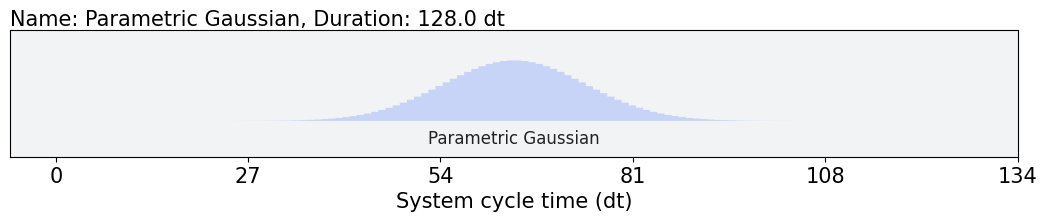

In [22]:
gaussian = pulse.library.Gaussian(num_samples, amp, sigma,
                              name="Parametric Gaussian")
gaussian.draw()

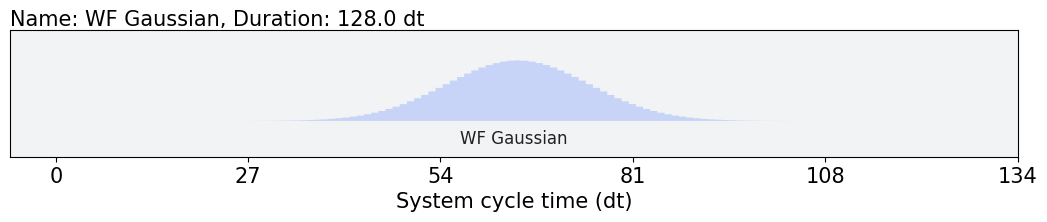

In [23]:
import numpy as np
 
times = np.arange(num_samples)
gaussian_samples = np.exp(-1/2 *((times - num_samples / 2) ** 2 / sigma**2))
 
gaussian = library.Waveform(gaussian_samples, name="WF Gaussian")
gaussian.draw()

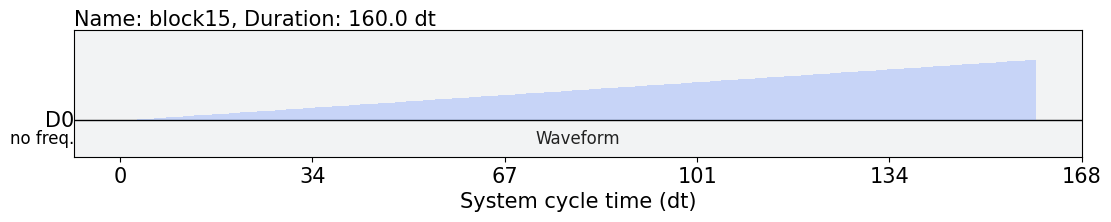

In [31]:
with pulse.build() as schedule:
    pulse.play([0.001*i for i in range(160)], channel)
schedule.draw()

In [37]:
with pulse.build(backend) as schedule:
    pulse.set_frequency(4.5e9, channel)

d0 = pulse.DriveChannel(0)
 
with pulse.build() as pulse_prog:
    pulse.shift_frequency(1e9, d0)
    pulse.set_phase(np.pi, d0)

In [38]:
with pulse.build(backend) as schedule:
    pulse.shift_phase(np.pi, channel)

In [39]:
from qiskit.pulse import Acquire, AcquireChannel, MemorySlot
 
with pulse.build(backend) as schedule:
    pulse.acquire(1200, pulse.acquire_channel(0), MemorySlot(0))

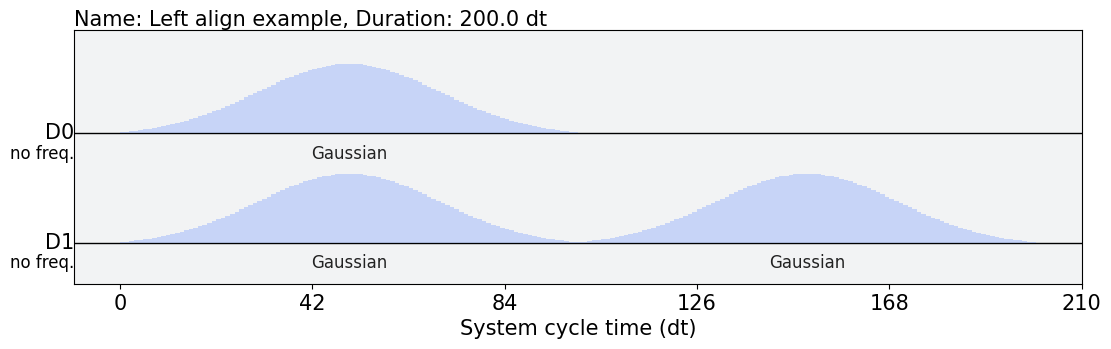

In [47]:
with pulse.build(backend, name='Left align example') as program:
    with pulse.align_left():
        gaussian_pulse = library.Gaussian(100, 0.5, 20)
        pulse.play(gaussian_pulse, pulse.drive_channel(0))
        pulse.play(gaussian_pulse, pulse.drive_channel(1))
        pulse.play(gaussian_pulse, pulse.drive_channel(1))
 
program.draw()

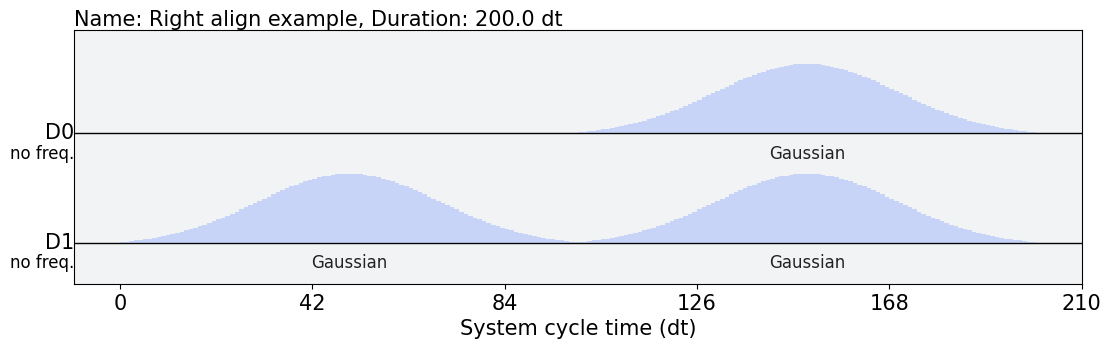

In [45]:
with pulse.build(backend, name='Right align example') as program:
    with pulse.align_right():
        gaussian_pulse = library.Gaussian(100, 0.5, 20)
        pulse.play(gaussian_pulse, pulse.drive_channel(0))
        pulse.play(gaussian_pulse, pulse.drive_channel(1))
        pulse.play(gaussian_pulse, pulse.drive_channel(1))
 
program.draw()

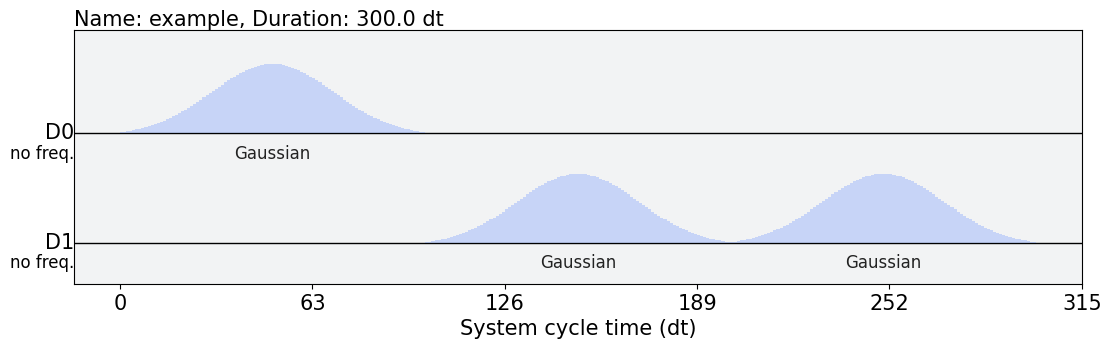

In [48]:
with pulse.build(backend, name='example') as program:
    with pulse.align_sequential():
        gaussian_pulse = library.Gaussian(100, 0.5, 20)
        pulse.play(gaussian_pulse, pulse.drive_channel(0))
        pulse.play(gaussian_pulse, pulse.drive_channel(1))
        pulse.play(gaussian_pulse, pulse.drive_channel(1))
 
program.draw()

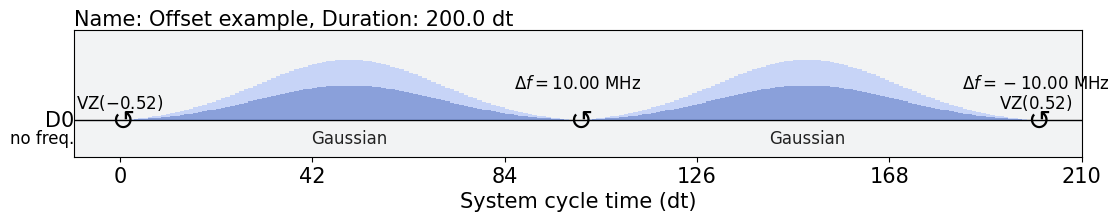

In [52]:
with pulse.build(backend, name='Offset example') as program:
    with pulse.phase_offset(3.14/6, pulse.drive_channel(0)):
        pulse.play(gaussian_pulse, pulse.drive_channel(0))
        with pulse.frequency_offset(10e6, pulse.drive_channel(0)):
            pulse.play(gaussian_pulse, pulse.drive_channel(0))
 
program.draw()

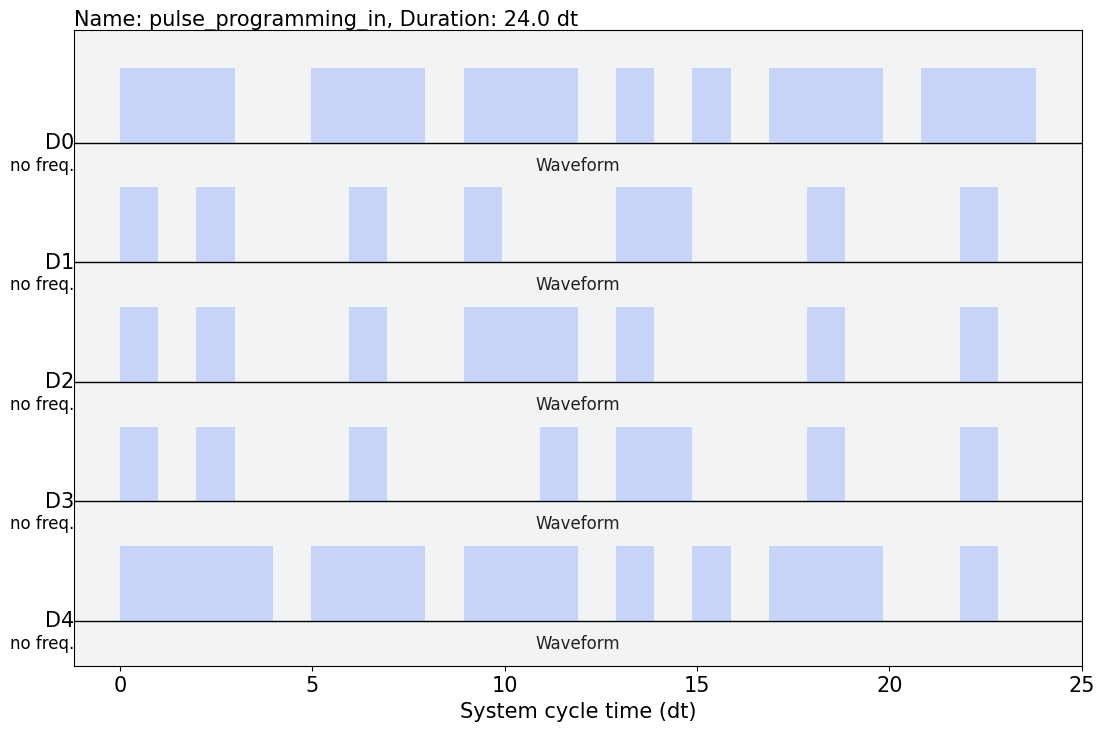

In [53]:
#https://docs.quantum.ibm.com/api/qiskit/pulse
from qiskit import pulse
 
dc = pulse.DriveChannel
d0, d1, d2, d3, d4 = dc(0), dc(1), dc(2), dc(3), dc(4)
 
with pulse.build(name='pulse_programming_in') as pulse_prog:
    pulse.play([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1], d0)
    pulse.play([1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0], d1)
    pulse.play([1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0], d2)
    pulse.play([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0], d3)
    pulse.play([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0], d4)
 
pulse_prog.draw()

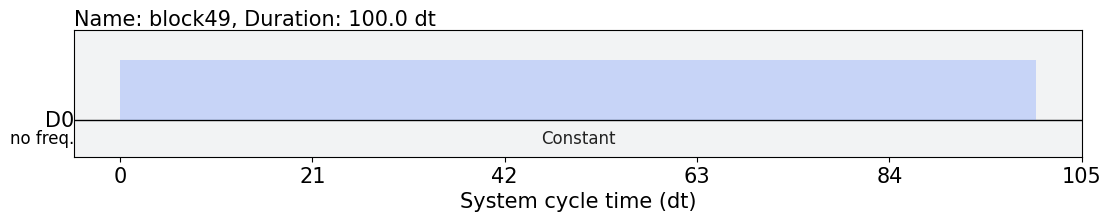

In [54]:
from qiskit import pulse
 
d0 = pulse.DriveChannel(0)
 
with pulse.build() as pulse_prog:
    pulse.play(pulse.Constant(100, 1.0), d0)
 
pulse_prog.draw()

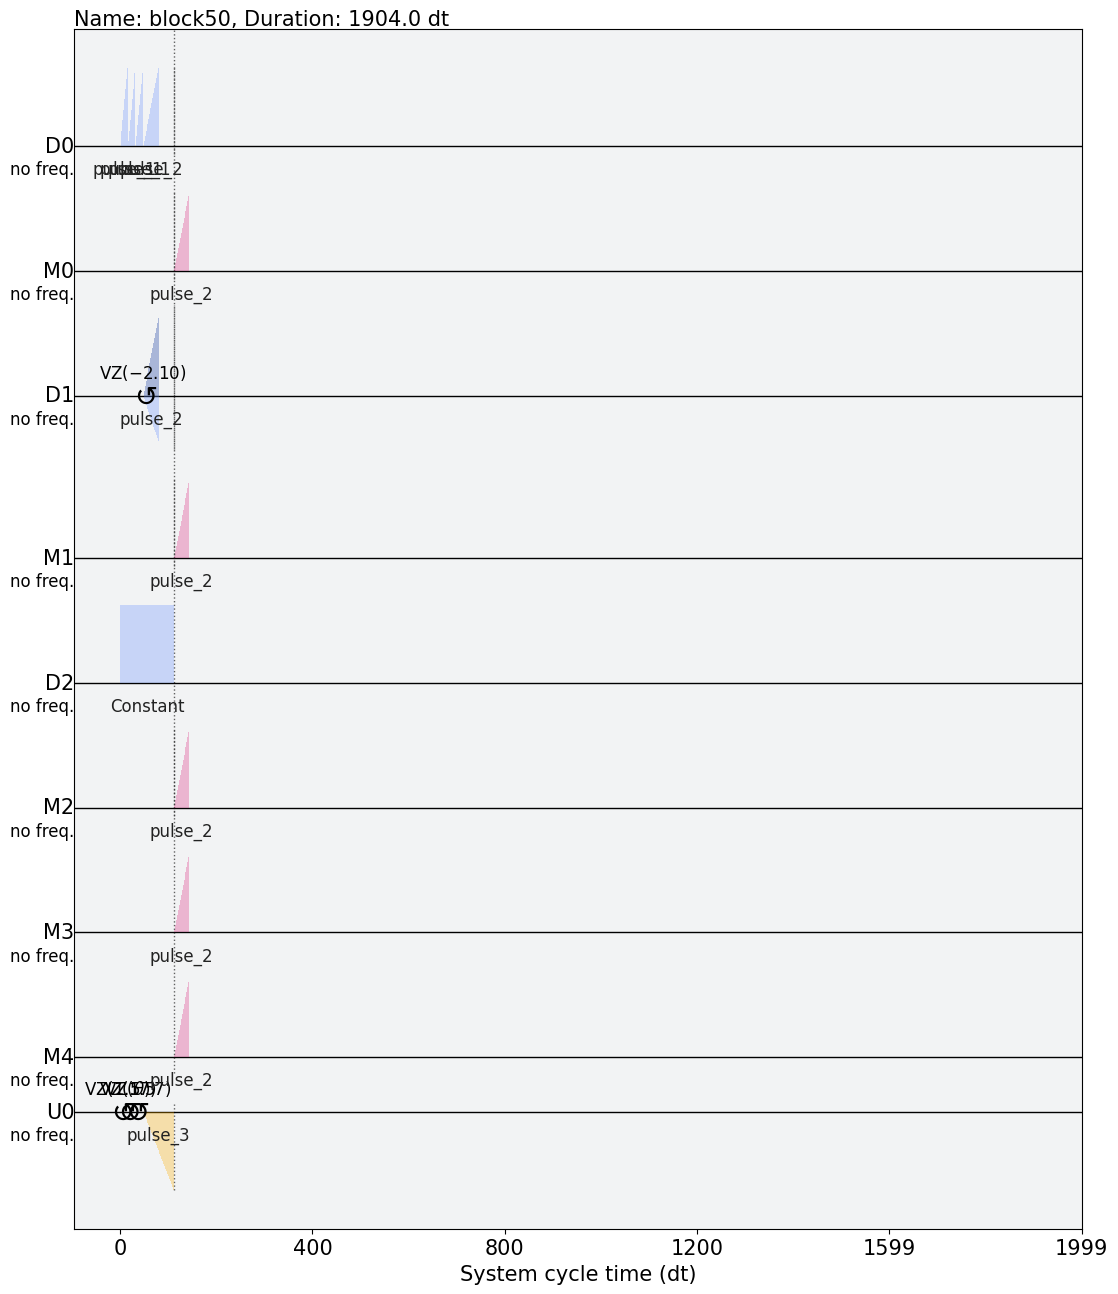

In [55]:
from math import pi
from qiskit.compiler import schedule
from qiskit.circuit import QuantumCircuit
 
from qiskit import pulse
from qiskit.providers.fake_provider import GenericBackendV2
 
backend = GenericBackendV2(num_qubits=5, calibrate_instructions=True)
 
d2 = pulse.DriveChannel(2)
 
qc = QuantumCircuit(2)
# Hadamard
qc.rz(pi/2, 0)
qc.sx(0)
qc.rz(pi/2, 0)
 
qc.cx(0, 1)
 
bell_sched = schedule(qc, backend)
 
with pulse.build(backend) as decoupled_bell_prep_and_measure:
    # We call our bell state preparation schedule constructed above.
    with pulse.align_right():
        pulse.call(bell_sched)
        pulse.play(pulse.Constant(bell_sched.duration, 0.02), d2)
        pulse.barrier(0, 1, 2)
        registers = pulse.measure_all()
 
decoupled_bell_prep_and_measure.draw()

In [60]:
import math
from qiskit.compiler import schedule
 
from qiskit import pulse, QuantumCircuit
from qiskit.pulse import library
from qiskit.providers.fake_provider import FakeOpenPulse2Q
 
backend = FakeOpenPulse2Q()
 
qc = QuantumCircuit(2, 2)
qc.cx(0, 1)
 
with pulse.build(backend) as pulse_prog:
    # Create a pulse.
    gaussian_pulse = library.Gaussian(10, 1.0, 2)
    # Get the qubit's corresponding drive channel from the backend. gaussian_pulse = library.Gaussian(100, 0.5, 20)
    d0 = pulse.drive_channel(0)
    d1 = pulse.drive_channel(1)
    # Play a pulse at t=0.
    pulse.play(gaussian_pulse, d0)
    # Play another pulse directly after the previous pulse at t=10.
    pulse.play(gaussian_pulse, d0)
    # The default scheduling behavior is to schedule pulses in parallel
    # across channels. For example, the statement below
    # plays the same pulse on a different channel at t=0.
    pulse.play(gaussian_pulse, d1)
 
    # We also provide pulse scheduling alignment contexts.
    # The default alignment context is align_left.
 
    # The sequential context schedules pulse instructions sequentially in time.
    # This context starts at t=10 due to earlier pulses above.
    with pulse.align_sequential():
        pulse.play(gaussian_pulse, d0)
        # Play another pulse after at t=20.
        pulse.play(gaussian_pulse, d1)
 
        # We can also nest contexts as each instruction is
        # contained in its local scheduling context.
        # The output of a child context is a context-schedule
        # with the internal instructions timing fixed relative to
        # one another. This is schedule is then called in the parent context.
 
        # Context starts at t=30.
        with pulse.align_left():
            # Start at t=30.
            pulse.play(gaussian_pulse, d0)
            # Start at t=30.
            pulse.play(gaussian_pulse, d1)
        # Context ends at t=40.
 
        # Alignment context where all pulse instructions are
        # aligned to the right, ie., as late as possible.
        with pulse.align_right():
            # Shift the phase of a pulse channel.
            pulse.shift_phase(math.pi, d1)
            # Starts at t=40.
            pulse.delay(100, d0)
            # Ends at t=140.
 
            # Starts at t=130.
            pulse.play(gaussian_pulse, d1)
            # Ends at t=140.
 
        # Acquire data for a qubit and store in a memory slot.
        pulse.acquire(100, 0, pulse.MemorySlot(0))
 
        # We also support a variety of macros for common operations.
 
        # Measure all qubits.
        pulse.measure_all()
 
        # Delay on some qubits.
        # This requires knowledge of which channels belong to which qubits.
        # delay for 100 cycles on qubits 0 and 1.
        pulse.delay_qubits(100, 0, 1)
 
        # Call a schedule for a quantum circuit thereby inserting into
        # the pulse schedule.
        qc = QuantumCircuit(2, 2)
        qc.cx(0, 1)
        qc_sched = schedule(qc, backend)
        pulse.call(qc_sched)
 
 
        # It is also be possible to call a preexisting schedule
        tmp_sched = pulse.Schedule()
        tmp_sched += pulse.Play(gaussian_pulse, d0)
        pulse.call(tmp_sched)
 
        # We also support:
 
        # frequency instructions
        pulse.set_frequency(5.0e9, d0)
 
        # phase instructions
        pulse.shift_phase(0.1, d0)
 
        # offset contexts
        with pulse.phase_offset(math.pi, d0):
            pulse.play(gaussian_pulse, d0)

C:\Users\mcniv\AppData\Local\Temp\ipykernel_49356\4034584806.py:8: DeprecationWarning: The class ``qiskit.providers.models.backendconfiguration.GateConfig`` is deprecated as of qiskit 1.2. It will be removed in the 2.0 release. The models in ``qiskit.providers.models`` are part of the deprecated `BackendV1` workflow  and no longer necessary for `BackendV2`. If a user workflow requires these representations it likely relies on deprecated functionality and should be updated to use `BackendV2`.
  backend = FakeOpenPulse2Q()
C:\Users\mcniv\AppData\Local\Temp\ipykernel_49356\4034584806.py:8: DeprecationWarning: The class ``qiskit.providers.models.backendconfiguration.PulseBackendConfiguration`` is deprecated as of qiskit 1.2. It will be removed in the 2.0 release. The models in ``qiskit.providers.models`` are part of the deprecated `BackendV1` workflow  and no longer necessary for `BackendV2`. If a user workflow requires these representations it likely relies on deprecated functionality and

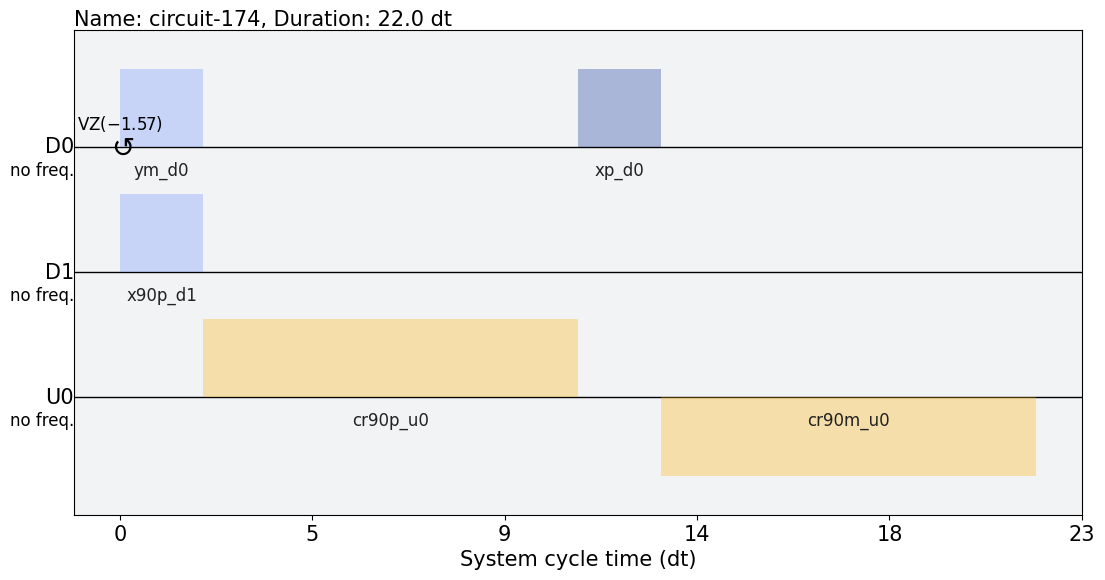

In [62]:
qc_sched.draw()

In [74]:
from qiskit import transpile, pulse
from qiskit.providers.fake_provider import FakeOpenPulse2Q
 
backend = FakeOpenPulse2Q()
d0 = pulse.DriveChannel(0)
 
with pulse.build() as pulse_prog:
    pulse.play(pulse.Constant(100, 0.5), d0)
#print(backend)

C:\Users\mcniv\AppData\Local\Temp\ipykernel_49356\1420300998.py:4: DeprecationWarning: The class ``qiskit.providers.models.backendconfiguration.GateConfig`` is deprecated as of qiskit 1.2. It will be removed in the 2.0 release. The models in ``qiskit.providers.models`` are part of the deprecated `BackendV1` workflow  and no longer necessary for `BackendV2`. If a user workflow requires these representations it likely relies on deprecated functionality and should be updated to use `BackendV2`.
  backend = FakeOpenPulse2Q()
C:\Users\mcniv\AppData\Local\Temp\ipykernel_49356\1420300998.py:4: DeprecationWarning: The class ``qiskit.providers.models.backendconfiguration.PulseBackendConfiguration`` is deprecated as of qiskit 1.2. It will be removed in the 2.0 release. The models in ``qiskit.providers.models`` are part of the deprecated `BackendV1` workflow  and no longer necessary for `BackendV2`. If a user workflow requires these representations it likely relies on deprecated functionality and

In [64]:
backend.run(transpile(pulse_prog, backend))

C:\Users\mcniv\AppData\Local\Temp\ipykernel_49356\621716024.py:1: DeprecationWarning: The `transpile` function will stop supporting inputs of type `BackendV1` ( fake_openpulse_2q ) in the `backend` parameter in a future release no earlier than 2.0. `BackendV1` is deprecated and implementations should move to `BackendV2`.
  backend.run(transpile(pulse_prog, backend))


AttributeError: 'ScheduleBlock' object has no attribute 'qubits'

In [75]:
from qiskit import pulse
from qiskit.providers.fake_provider import GenericBackendV2
 
backend = GenericBackendV2(num_qubits=2, calibrate_instructions=True)
 
with pulse.build(backend) as drive_sched:
    d0 = pulse.drive_channel(0)
    print(d0)

DriveChannel(0)


In [76]:
from qiskit import pulse
from qiskit.providers.fake_provider import FakeOpenPulse2Q
 
backend = FakeOpenPulse2Q()
 
with pulse.build(backend):
    assert pulse.acquire_channel(0) == pulse.AcquireChannel(0)

C:\Users\mcniv\AppData\Local\Temp\ipykernel_49356\1604870410.py:4: DeprecationWarning: The class ``qiskit.providers.models.backendconfiguration.GateConfig`` is deprecated as of qiskit 1.2. It will be removed in the 2.0 release. The models in ``qiskit.providers.models`` are part of the deprecated `BackendV1` workflow  and no longer necessary for `BackendV2`. If a user workflow requires these representations it likely relies on deprecated functionality and should be updated to use `BackendV2`.
  backend = FakeOpenPulse2Q()
C:\Users\mcniv\AppData\Local\Temp\ipykernel_49356\1604870410.py:4: DeprecationWarning: The class ``qiskit.providers.models.backendconfiguration.PulseBackendConfiguration`` is deprecated as of qiskit 1.2. It will be removed in the 2.0 release. The models in ``qiskit.providers.models`` are part of the deprecated `BackendV1` workflow  and no longer necessary for `BackendV2`. If a user workflow requires these representations it likely relies on deprecated functionality and

In [77]:
from qiskit import pulse
from qiskit.providers.fake_provider import FakeOpenPulse2Q
 
backend = FakeOpenPulse2Q()
with pulse.build(backend):
    assert pulse.control_channels(0, 1) == [pulse.ControlChannel(0)]

C:\Users\mcniv\AppData\Local\Temp\ipykernel_49356\953926073.py:4: DeprecationWarning: The class ``qiskit.providers.models.backendconfiguration.GateConfig`` is deprecated as of qiskit 1.2. It will be removed in the 2.0 release. The models in ``qiskit.providers.models`` are part of the deprecated `BackendV1` workflow  and no longer necessary for `BackendV2`. If a user workflow requires these representations it likely relies on deprecated functionality and should be updated to use `BackendV2`.
  backend = FakeOpenPulse2Q()
C:\Users\mcniv\AppData\Local\Temp\ipykernel_49356\953926073.py:4: DeprecationWarning: The class ``qiskit.providers.models.backendconfiguration.PulseBackendConfiguration`` is deprecated as of qiskit 1.2. It will be removed in the 2.0 release. The models in ``qiskit.providers.models`` are part of the deprecated `BackendV1` workflow  and no longer necessary for `BackendV2`. If a user workflow requires these representations it likely relies on deprecated functionality and s

In [78]:
from qiskit import pulse
from qiskit.providers.fake_provider import FakeOpenPulse2Q
 
backend = FakeOpenPulse2Q()
 
with pulse.build(backend):
    assert pulse.drive_channel(0) == pulse.DriveChannel(0)

C:\Users\mcniv\AppData\Local\Temp\ipykernel_49356\925530146.py:4: DeprecationWarning: The class ``qiskit.providers.models.backendconfiguration.GateConfig`` is deprecated as of qiskit 1.2. It will be removed in the 2.0 release. The models in ``qiskit.providers.models`` are part of the deprecated `BackendV1` workflow  and no longer necessary for `BackendV2`. If a user workflow requires these representations it likely relies on deprecated functionality and should be updated to use `BackendV2`.
  backend = FakeOpenPulse2Q()
C:\Users\mcniv\AppData\Local\Temp\ipykernel_49356\925530146.py:4: DeprecationWarning: The class ``qiskit.providers.models.backendconfiguration.PulseBackendConfiguration`` is deprecated as of qiskit 1.2. It will be removed in the 2.0 release. The models in ``qiskit.providers.models`` are part of the deprecated `BackendV1` workflow  and no longer necessary for `BackendV2`. If a user workflow requires these representations it likely relies on deprecated functionality and s

In [79]:
from qiskit import pulse
from qiskit.providers.fake_provider import FakeOpenPulse2Q
 
backend = FakeOpenPulse2Q()
 
with pulse.build(backend):
    assert pulse.measure_channel(0) == pulse.MeasureChannel(0)

C:\Users\mcniv\AppData\Local\Temp\ipykernel_49356\257968415.py:4: DeprecationWarning: The class ``qiskit.providers.models.backendconfiguration.GateConfig`` is deprecated as of qiskit 1.2. It will be removed in the 2.0 release. The models in ``qiskit.providers.models`` are part of the deprecated `BackendV1` workflow  and no longer necessary for `BackendV2`. If a user workflow requires these representations it likely relies on deprecated functionality and should be updated to use `BackendV2`.
  backend = FakeOpenPulse2Q()
C:\Users\mcniv\AppData\Local\Temp\ipykernel_49356\257968415.py:4: DeprecationWarning: The class ``qiskit.providers.models.backendconfiguration.PulseBackendConfiguration`` is deprecated as of qiskit 1.2. It will be removed in the 2.0 release. The models in ``qiskit.providers.models`` are part of the deprecated `BackendV1` workflow  and no longer necessary for `BackendV2`. If a user workflow requires these representations it likely relies on deprecated functionality and s

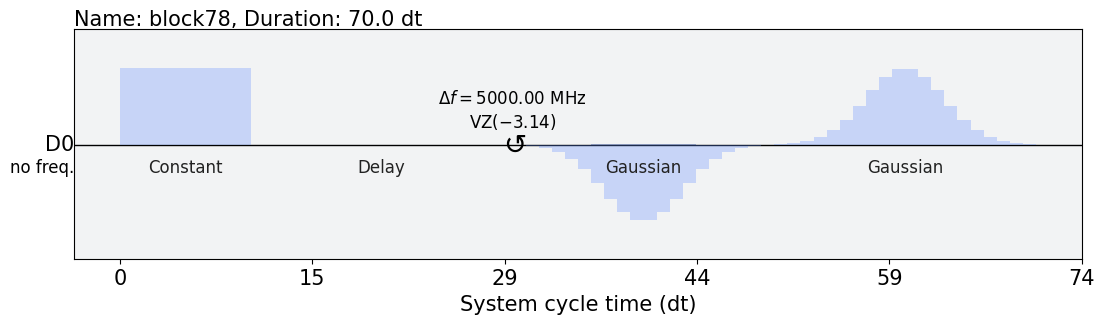

In [80]:
from qiskit import pulse
from qiskit.providers.fake_provider import GenericBackendV2
 
backend = GenericBackendV2(num_qubits=2, calibrate_instructions=True)
 
with pulse.build(backend) as drive_sched:
    d0 = pulse.drive_channel(0)
    a0 = pulse.acquire_channel(0)
 
    pulse.play(pulse.library.Constant(10, 1.0), d0)
    pulse.delay(20, d0)
    pulse.shift_phase(3.14/2, d0)
    pulse.set_phase(3.14, d0)
    pulse.shift_frequency(1e7, d0)
    pulse.set_frequency(5e9, d0)
 
    with pulse.build() as temp_sched:
        pulse.play(pulse.library.Gaussian(20, 1.0, 3.0), d0)
        pulse.play(pulse.library.Gaussian(20, -1.0, 3.0), d0)
 
    pulse.call(temp_sched)
    pulse.acquire(30, a0, pulse.MemorySlot(0))
 
drive_sched.draw()

In [81]:
from qiskit import pulse
 
acq0 = pulse.AcquireChannel(0)
mem0 = pulse.MemorySlot(0)
 
with pulse.build() as pulse_prog:
    pulse.acquire(100, acq0, mem0)
 
    # measurement metadata
    kernel = pulse.configuration.Kernel('linear_discriminator')
    pulse.acquire(100, acq0, mem0, kernel=kernel)

In [82]:
from qiskit import pulse
from qiskit.providers.fake_provider import FakeOpenPulse2Q
 
backend = FakeOpenPulse2Q()
 
d0 = pulse.DriveChannel(0)
d1 = pulse.DriveChannel(1)
 
with pulse.build(backend) as barrier_pulse_prog:
    pulse.play(pulse.Constant(10, 1.0), d0)
    pulse.barrier(d0, d1)
    pulse.play(pulse.Constant(10, 1.0), d1)

C:\Users\mcniv\AppData\Local\Temp\ipykernel_49356\1162999245.py:4: DeprecationWarning: The class ``qiskit.providers.models.backendconfiguration.GateConfig`` is deprecated as of qiskit 1.2. It will be removed in the 2.0 release. The models in ``qiskit.providers.models`` are part of the deprecated `BackendV1` workflow  and no longer necessary for `BackendV2`. If a user workflow requires these representations it likely relies on deprecated functionality and should be updated to use `BackendV2`.
  backend = FakeOpenPulse2Q()
C:\Users\mcniv\AppData\Local\Temp\ipykernel_49356\1162999245.py:4: DeprecationWarning: The class ``qiskit.providers.models.backendconfiguration.PulseBackendConfiguration`` is deprecated as of qiskit 1.2. It will be removed in the 2.0 release. The models in ``qiskit.providers.models`` are part of the deprecated `BackendV1` workflow  and no longer necessary for `BackendV2`. If a user workflow requires these representations it likely relies on deprecated functionality and

In [83]:
from qiskit.pulse import transforms
 
with pulse.build(backend) as aligned_pulse_prog:
    with pulse.align_sequential():
        pulse.play(pulse.Constant(10, 1.0), d0)
        pulse.play(pulse.Constant(10, 1.0), d1)
 
barrier_pulse_prog = transforms.target_qobj_transform(barrier_pulse_prog)
aligned_pulse_prog = transforms.target_qobj_transform(aligned_pulse_prog)
 
assert barrier_pulse_prog == aligned_pulse_prog

In [88]:
from qiskit import circuit, pulse
from qiskit.providers.fake_provider import GenericBackendV2
 
backend = GenericBackendV2(num_qubits=5, calibrate_instructions=True)
 
with pulse.build() as x_sched:
    pulse.play(pulse.Gaussian(160, 0.1, 40), pulse.DriveChannel(0))
 
with pulse.build() as pulse_prog:
    pulse.call(x_sched)
 
print(pulse_prog)

ScheduleBlock(ScheduleBlock(Play(Gaussian(duration=160, sigma=40, amp=0.1, angle=0.0), DriveChannel(0)), name="block92", transform=AlignLeft()), name="block93", transform=AlignLeft())


In [89]:
ScheduleBlock(
    ScheduleBlock(
        Play(
            Gaussian(duration=160, amp=(0.1+0j), sigma=40),
            DriveChannel(0)
        ),
        name="block0",
        transform=AlignLeft()
    ),
    name="block1",
    transform=AlignLeft()
)

NameError: name 'ScheduleBlock' is not defined